# Classificação de Vinho

In [5]:
import pandas as pd

URL = 'https://raw.githubusercontent.com/ricardo-jr37/mlflow_tutorial/master/data/wine.data'

df = pd.read_csv(URL)

cols = ['label']

cols.extend(['feature_'+str(i) for i in range(1,14)])

df.columns = cols 

df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Treino, teste e validação

In [11]:
# Treino, teste e validação
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) 


# Modelo

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


n_vizinhos = 3
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
model = Pipeline([('scaler', StandardScaler()), ('knn', knn)])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

def metricas(y_test, y_predict):
    acuracia = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict,average='weighted')
    recall = recall_score(y_test, y_predict,average='weighted')
    f1 = f1_score(y_test, y_predict,average='weighted')
    return acuracia, precision, recall, f1

def matriz_confusao(y_test, y_predict):
    matriz_conf = confusion_matrix(y_test.values.ravel(), y_predict)

    fig = plt.figure()
    ax = plt.subplot()
    
    sns.heatmap(matriz_conf, annot=True, cmap='Blues', ax=ax)

    ax.set_xlabel('Valor Predito')
    ax.set_ylabel('Valor Real') 
    ax.set_title('Matriz de Confusão') 
    ax.xaxis.set_ticklabels(['Classe 1', 'Classe 2', 'Classe 3'])
    ax.yaxis.set_ticklabels(['Classe 1', 'Classe 2', 'Classe 3'])
    plt.show()
    plt.close()
    return fig

In [18]:
acuracia, precision, recall, f1 = metricas(y_test, y_pred)

print(f"acuracia: {acuracia}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}") 

acuracia: 0.9444444444444444
precision: 0.949129188712522
recall: 0.9444444444444444
f1: 0.943416803900675


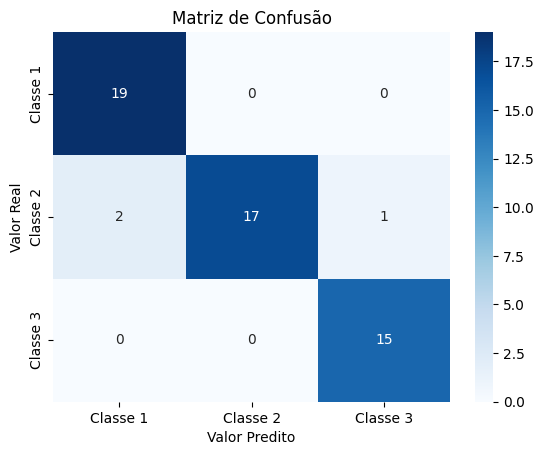

In [27]:
matriz_conf = matriz_confusao(y_test, y_pred)

In [28]:
fig_name = "matriz_confusao.png"
matriz_conf.savefig(fig_name)

In [31]:
# Empacotando modelo
import joblib

file_model = 'knn_model.pkl'

joblib.dump(model, file_model)

['knn_model.pkl']

In [36]:
# Validação

val_model = joblib.load(file_model)
val_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [45]:
val_model.predict(X_val)

array([3, 2, 1, 3, 3, 3, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1,
       3, 1, 1, 2, 2, 3, 2, 2, 2])

In [49]:
val_model.score(X_val,y_val)

0.967741935483871